
<h1>Tarea semanal 11</h1>

<h3> Consignas </h3>

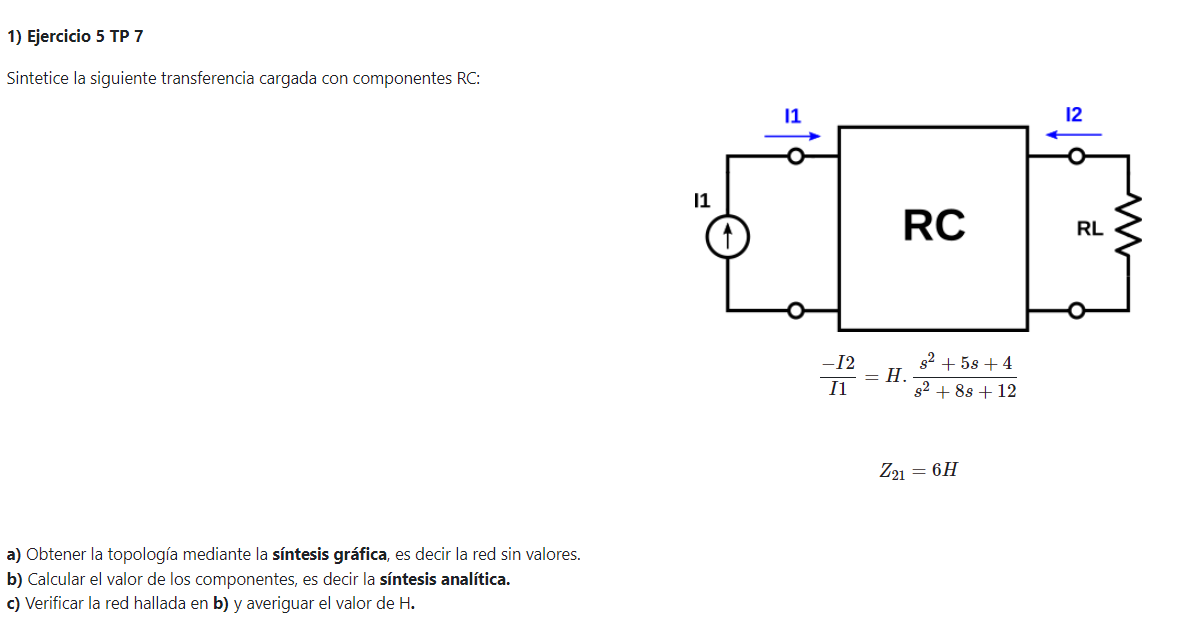

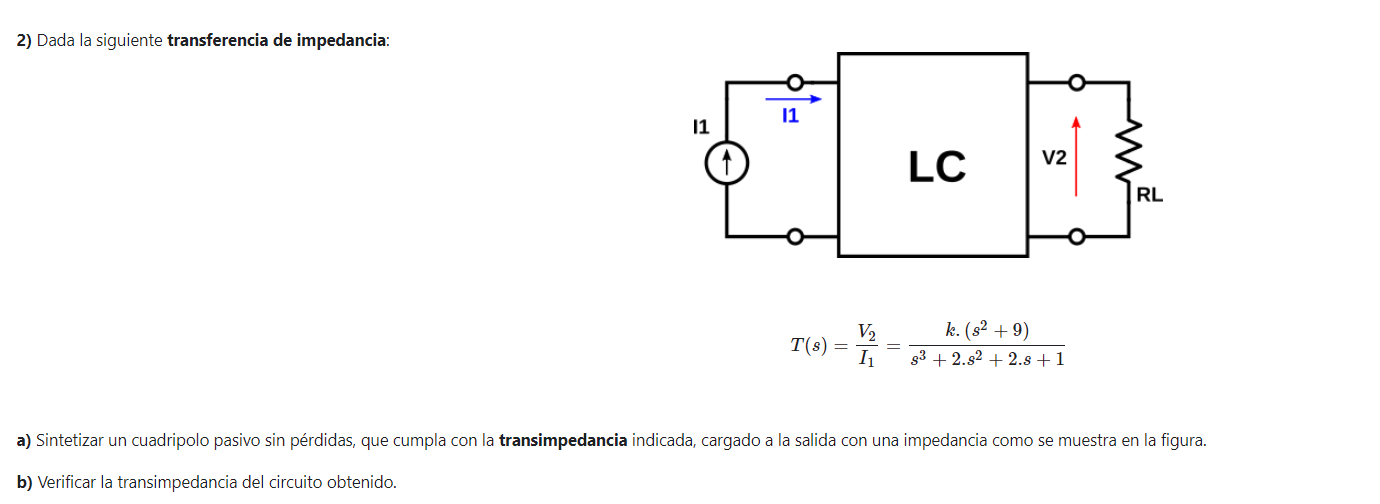

<h3> Resolucion de las consignas</h3>

Se adjunta el desarrollo hecho a mano:

<object data="Desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="Desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>

## Simulaciones

## 1)
## A continuacion se realiza la simulacion del primer ejercicio con LTSPICE y Python


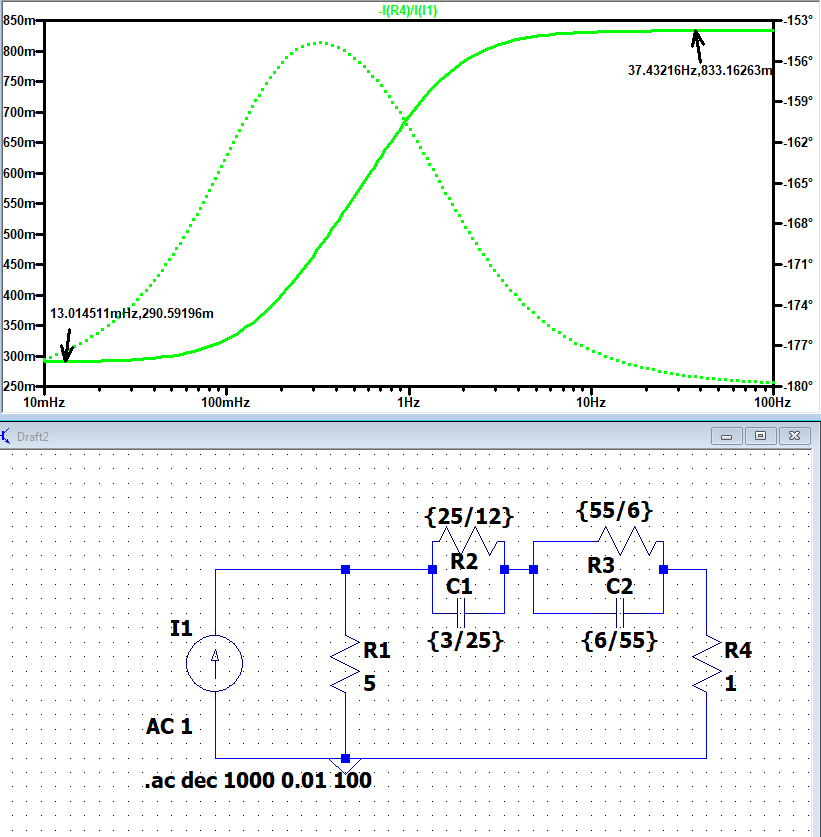


El resultado obtenido es un filtro pasa altos, con cierta atenuacion en la banda de paso. 
Se observa como para baja frecuencia se obtiene un valor de 290e-3 lo cual coincide se aproxima a los 290e-3 que se obtienen en la transferencia al hacer tender $->0.

Por otro lado para alta frecuencia obtenemos un valor de 833e-3 que coincide con el valor de H obtenido (5/6).

Se verifica entonces que la transferencia coincide con los resultados calculados



In [19]:
import sympy as sp
from pytc2.remociones import *
from pytc2.dibujar import *
# Resolución simbólica

s = sp.symbols('s ', complex=True)

Z22 = 5*((s + 2)*(s + sp.Rational('13/2')))/((s + 1)*(s + 4))
omega_cero = 1   # Omega de resonancia

Z2, Z1, R3, C2 = remover_polo_sigma(Z22, omega_cero, isImpedance = True, isRC = True)

omega_cero = 4   # Omega de resonancia

Z4, Z3, R2, C1 = remover_polo_sigma(Z2, omega_cero, isImpedance = True)

Y6, G1 = remover_valor(1/Z4, sigma_zero = sp.Rational('1/5'))

print('Verificación')

TR1 = sp.Matrix([[1, 0], [G1, 1]])
Ta = sp.Matrix([[1, Z1 + Z3 + 1], [0, 1]])

tt =  TR1 * Ta

# calculo 1/C de la cascada total
zverif = sp.factor(sp.simplify(sp.expand(1/tt[1,1])))

display( zverif )

Verificación


10*(s + 1)*(s + 4)/((s + 6)*(12*s + 23))

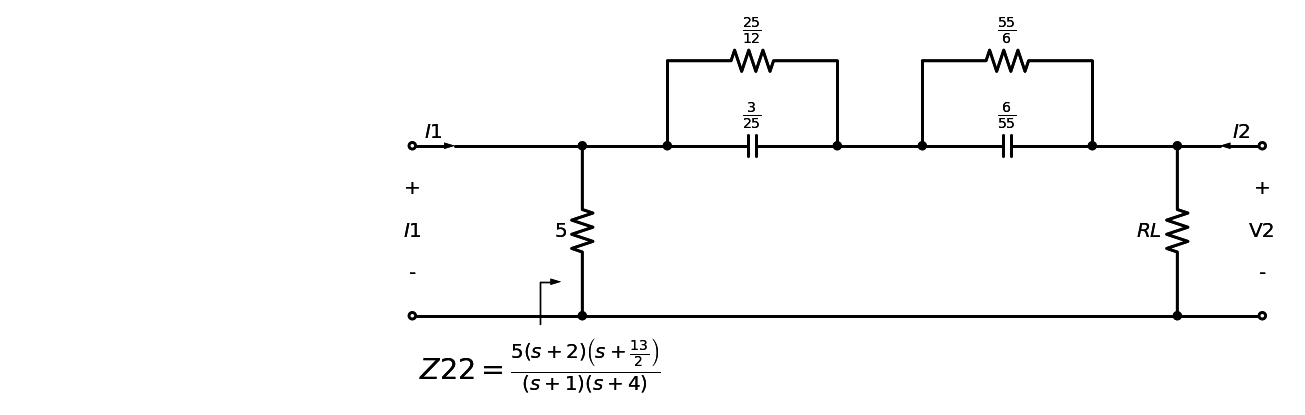

In [20]:
#RED obtenida

d = Drawing(unit=4)
d = dibujar_puerto_entrada(d, voltage_lbl = ('+', '$I1$', '-'), current_lbl = '$I1$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Z22', Z22, hacia_salida = True, k_gap_width = 0.5)
d = dibujar_elemento_derivacion(d, Resistor, 1/G1)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_serie(d, R2, C1)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_serie(d, R3, C2)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Resistor, "RL")
d = dibujar_puerto_salida(d, voltage_lbl = ('+', 'V2', '-'), current_lbl = '$I2$')

display(d)

## 2) 
### A continuacion se realiza la simulacion del segundo ejercicio con LTSPICE


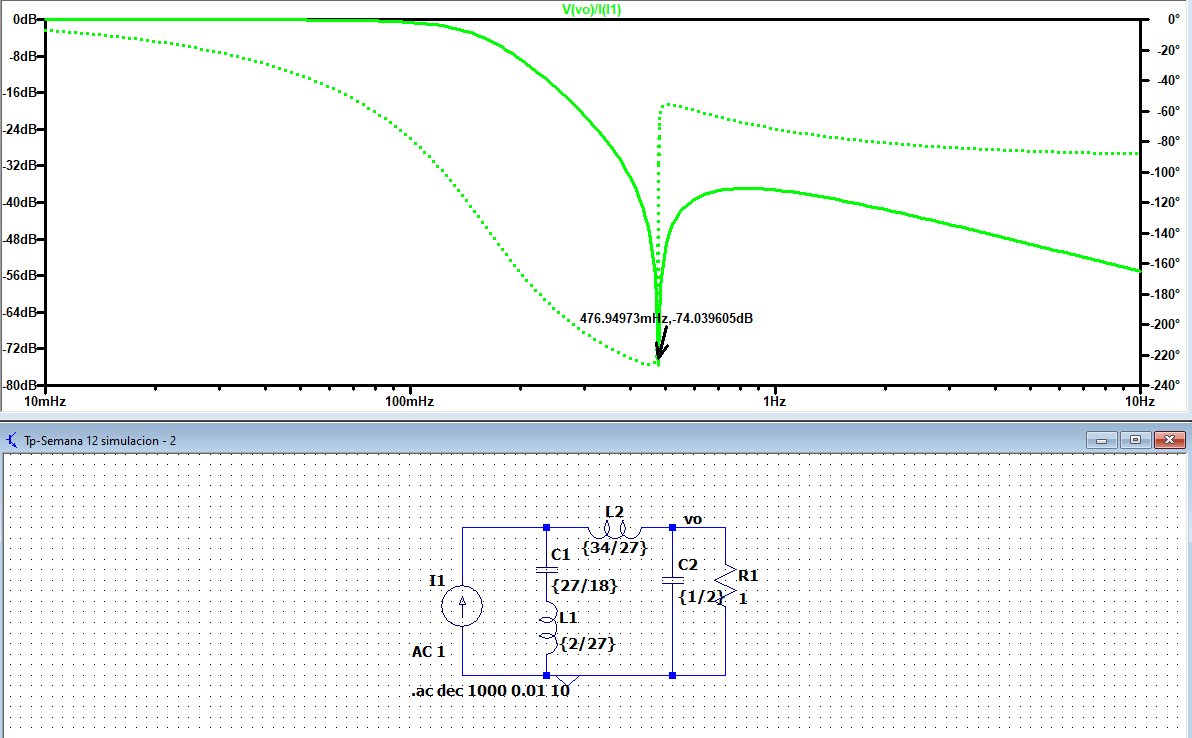

Se puede ver como el filtro corresponde con un filtro pasa bajos notch. El mismo presenta las siguientes caracteristicas:

En este caso se puede observar:
* un cero en f=476.93e-3 -> W = 3
* un cero en infinito -> W -> oo

